## Ad Clicks Prediction Model Using Logistic Regresion

In [129]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
#read dataset
data = pd.read_csv("advertising.csv")
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0
...,...,...,...,...,...,...,...,...,...,...
964,65.07,24,57545.56,233.85,Multi-lateral multi-state encryption,Port Raymondfort,0,Mali,2016-01-03 7:13:53,0
965,35.25,50,47051.02,194.44,Intuitive global website,Waltertown,0,Iran,2016-01-03 4:39:47,1
966,37.58,52,51600.47,176.70,Exclusive disintermediate Internet solution,Cameronberg,1,Bulgaria,2016-04-13 13:04:47,1
967,68.01,25,68357.96,188.32,Ameliorated actuating workforce,Kaylashire,1,Afghanistan,2016-01-01 3:35:35,0


In [131]:
#descriptive statistics
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,65.150774,35.971104,55104.659979,180.227420,0.477812,0.495356
std,15.873593,8.764315,13376.057924,43.751344,0.499765,0.500237
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,51.560000,29.000000,47258.590000,139.010000,0.000000,0.000000
50%,68.470000,35.000000,57195.960000,183.850000,0.000000,0.000000
75%,78.670000,42.000000,65496.780000,218.800000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  969 non-null    float64
 1   Age                       969 non-null    int64  
 2   Area Income               969 non-null    float64
 3   Daily Internet Usage      969 non-null    float64
 4   Ad Topic Line             969 non-null    object 
 5   City                      969 non-null    object 
 6   Male                      969 non-null    int64  
 7   Country                   969 non-null    object 
 8   Timestamp                 969 non-null    object 
 9   Clicked on Ad             969 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 75.8+ KB


In [133]:
#check for null values
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

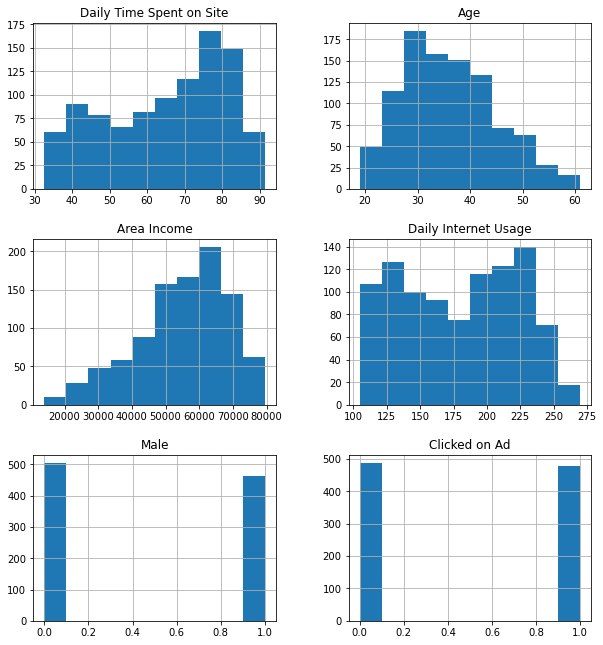

In [134]:
data.hist(figsize=(10,11))
plt.show()

In [135]:
# modelling - segregate data into test and train sets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [136]:
# segregate data into test and train sets
train= data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'],axis=1)
train


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
964,65.07,24,57545.56,233.85,0
965,35.25,50,47051.02,194.44,0
966,37.58,52,51600.47,176.70,1
967,68.01,25,68357.96,188.32,1


In [137]:
test = data['Clicked on Ad']
test

0      0
1      0
2      0
3      0
4      0
      ..
964    0
965    1
966    1
967    0
968    1
Name: Clicked on Ad, Length: 969, dtype: int64

In [138]:
x = train

In [139]:
y = test

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [141]:
lm = LogisticRegression()

In [142]:
lm.fit(x_train,y_train)

LogisticRegression()

In [143]:
lm.score(x_test,y_test)

0.9639175257731959